# 1  Скачивание, обработка и визуализация данных

##### Базовая настройка проекта

In [1]:
# !pip install numpy
# !pip install pyquery
# !pip install matplotlib

In [2]:
import numpy as np
from pyquery import PyQuery as pq
from matplotlib import pylab as plt

%matplotlib inline
%config InlineBackend.figure_format = "svg"

##### Скачиваем данные за 1995 -- 2015
в MJD (49718 -- 57023)

In [3]:
# Загрузка данных
def load_data(data_file: "html", ret_flag: int=0)->tuple:
    """
    Считывание данных из файла, удаление заголовков 
    и разбиение данных на дату и координаты
    """
    text = [item.text() for item in data_file.items("pre")]
    text = text[0].split()
    text = text[3:] # del table 
    del(text[2::3]) # del sigma from data
    
    date = np.array(text[0::2]).astype(float) # convert str to int
    
    data_value = np.array(text[1::2]).astype(float) # convert str value to float
    
    if ret_flag:
        return data_value, date
    return data_value

In [4]:
x_data = pq(filename="data_html/data_x.html")
y_data = pq(filename="data_html/data_y.html")

x_coord, date = load_data(x_data, 1)
y_coord = load_data(y_data)

##### Построим полученные данные

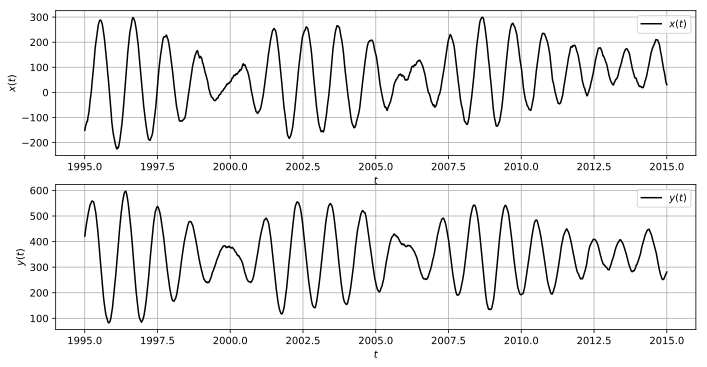

In [5]:
plt.figure(figsize=(11.5, 15.5))
plt.subplot(5,1,1)
plt.grid(True)
plt.ylabel("$x(t)$")
plt.xlabel("$t$")
plt.plot(date, x_coord, color="black", label="$x(t)$")
plt.legend()

plt.subplot(5,1,2)
plt.grid(True)
plt.ylabel("$y(t)$")
plt.xlabel("$t$")
plt.plot(date, y_coord, color="black", label="$y(t)$")
plt.legend()

plt.savefig("./figures/x_and_y.eps", format="eps")
plt.show()

#####  Удаления тренда и гармоник с $h < 7 $ лет

Удалим тренд. С помошью МНК найдем лин. часть  
$x'(t) = a_xt + b_x$  
$y'(t) = a_yt + b_y$

In [6]:
# удалим тренд
A_coord = np.vstack([date, np.ones(len(date))]).T
a_x, b_x = np.linalg.lstsq(A_coord, x_coord, rcond=None)[0]
a_y, b_y = np.linalg.lstsq(A_coord, y_coord, rcond=None)[0]
print("a_x = {}, b_x = {}".format(a_x, b_x))
print("a_y = {}, b_y = {}".format(a_y, b_y))
trend_x = a_x * date + b_x
trend_y = a_y * date + b_y
detrend_x = x_coord - trend_x
detrend_y = y_coord - trend_y

a_x = 3.6951872803300274, b_x = -7346.131623678598
a_y = 0.16215179400732527, b_y = 17.630149420655172


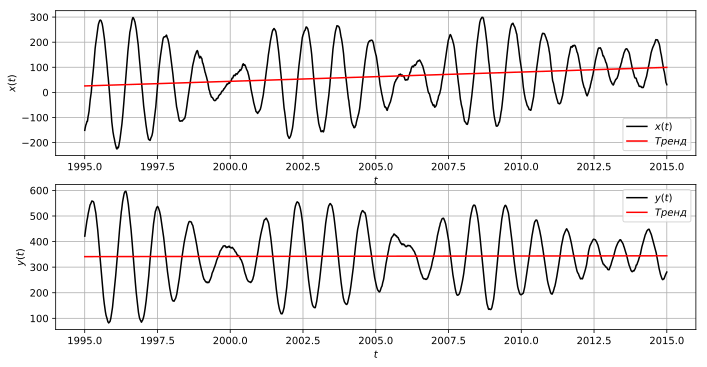

In [7]:
plt.figure(figsize=(11.5, 15.5))
plt.subplot(5,1,1)
plt.grid(True)
plt.ylabel("$x(t)$")
plt.xlabel("$t$")
plt.plot(date, x_coord, color="black", label="$x(t)$")
plt.plot(date, trend_x, color="red", label="$Тренд$")
plt.legend()

plt.subplot(5,1,2)
plt.grid(True)
plt.ylabel("$y(t)$")
plt.xlabel("$t$")
plt.plot(date, y_coord, color="black", label="$y(t)$")
plt.plot(date, trend_y, color="red", label="$Тренд$")
plt.legend()

plt.savefig("./figures/x_and_y_with_trend.eps", format="eps")
plt.show()

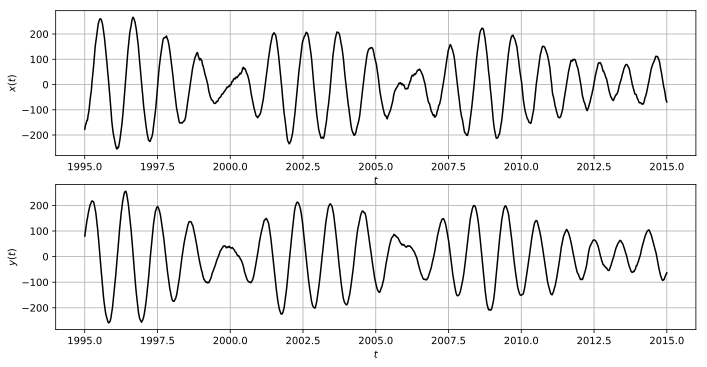

In [8]:
plt.figure(figsize=(11.5, 15.5))
plt.subplot(5,1,1)
plt.grid(True)
plt.ylabel("$x(t)$")
plt.xlabel("$t$")
plt.plot(date, detrend_x, color="black", label="$x(t)$")
# plt.legend()

plt.subplot(5,1,2)
plt.grid(True)
plt.ylabel("$y(t)$")
plt.xlabel("$t$")
plt.plot(date, detrend_y, color="black", label="$y(t)$")
# plt.legend()

plt.savefig("./figures/detrend_x_and_y.eps", format="eps")
plt.show()

In [9]:
with open("data_txt/detrend_x.txt", 'w') as datatxt:
    for i in range(len(x_coord)) :
        print(date[i], '\t', detrend_x[i], file=datatxt)
with open("data_txt/detrend_y.txt", 'w') as datatxt:
    for i in range(len(y_coord)) :
        print(date[i], '\t', detrend_y[i], file=datatxt)

In [10]:
H = 1 / 7
H

0.14285714285714285

##### Загружем отфильрованные данные

In [11]:
with open("data_txt/filtred_x.txt", 'r') as data_x_txt:
    data = data_x_txt.read()
    data = data.split()
    filtred_x = np.array(data[1::2]).astype(np.float32)
    filtred_date = np.array(data[0::2]).astype(np.float32)
    print(filtred_x.shape, filtred_date.shape)
with open("data_txt/filtred_y.txt", 'r') as data_y_txt:
    data = data_y_txt.read()
    data = data.split()
    filtred_y = np.array(data[1::2]).astype(np.float32)
    print(filtred_y.shape)

(7305,) (7305,)
(7305,)


##### Построим отфильтованные данные

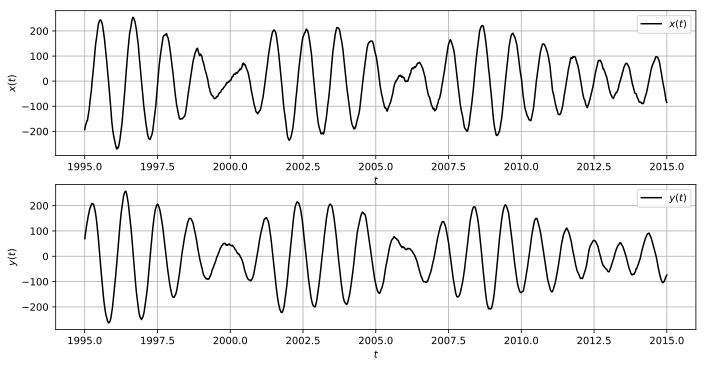

In [12]:
plt.figure(figsize=(11.5, 15.5))
plt.subplot(5,1,1)
plt.grid(True)
plt.ylabel("$x(t)$")
plt.xlabel("$t$")
plt.plot(filtred_date, filtred_x, color="black", label="$x(t)$")
plt.legend()

plt.subplot(5,1,2)
plt.grid(True)
plt.ylabel("$y(t)$")
plt.xlabel("$t$")
plt.plot(filtred_date, filtred_y, color="black", label="$y(t)$")
plt.legend()
plt.savefig("./figures/x_and_y_filtred.eps", format="eps")
plt.show()

# 2 Переходим к полярному углу

### Зададим функцию перехода как 

In [13]:
def polar_coordinate_system(x: "np.array", y: "np.array"):
    r = np.sqrt(x ** 2 + y ** 2)
#     phi = [np.arctan(y[0] / x[0]) + np.pi]
    phi = [0]
    for i in range(len(r) - 1):
        delta_x = x[i + 1] - x[i]
        delta_y = y[i + 1] - y[i]
        delta_r = np.sqrt(delta_x ** 2 + delta_y ** 2)
        delta_phi = np.arccos(np.minimum(1,(r[i + 1] ** 2 + r[i] ** 2 - delta_r ** 2)/
                              (2 * r[i + 1] * r[i])))
        k = (x[i] * (y[i] - y[i - 1]) - y[i] * (x[i] - x[i - 1]))
        k /= np.abs(k)
        phi.append(phi[i] + delta_phi * k)

    return r, phi

In [14]:
# найдем пол-е коор-ы для наших обработанных данных
r, phi = polar_coordinate_system(filtred_x, filtred_y)

In [15]:
print(np.shape(r), np.shape(phi), np.shape(filtred_date))

(7305,) (7305,) (7305,)


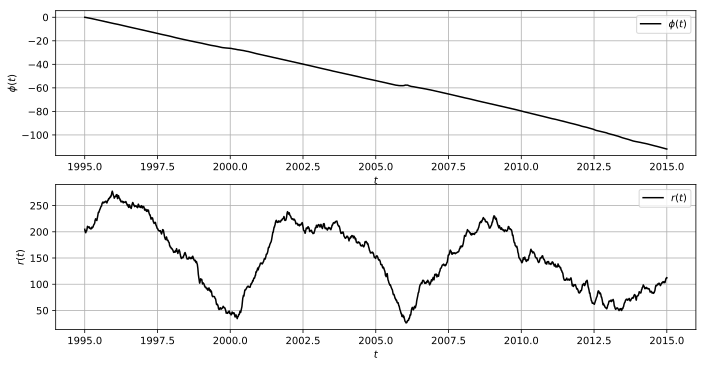

In [16]:
plt.figure(figsize=(11.5, 15.5))
plt.subplot(5,1,1)
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(filtred_date, phi, color="black", label="$\phi(t)$")
plt.legend()

plt.subplot(5,1,2)
plt.grid(True)
plt.ylabel("$r(t)$")
plt.xlabel("$t$")
plt.plot(filtred_date, r, color="black", label="$r(t)$")
plt.legend()
plt.savefig("./figures/polar.eps", format="eps")
plt.show()

### Удалим линейную состовляющую
$\phi(t)'= at + b$

In [17]:
A = np.vstack([filtred_date, np.ones(len(date))]).T
a, b = np.linalg.lstsq(A, phi, rcond=None)[0]
print("a = {}, b = {}".format(a, b))
trend = a * filtred_date + b

a = -5.454452481264412, b = 10882.422540893247


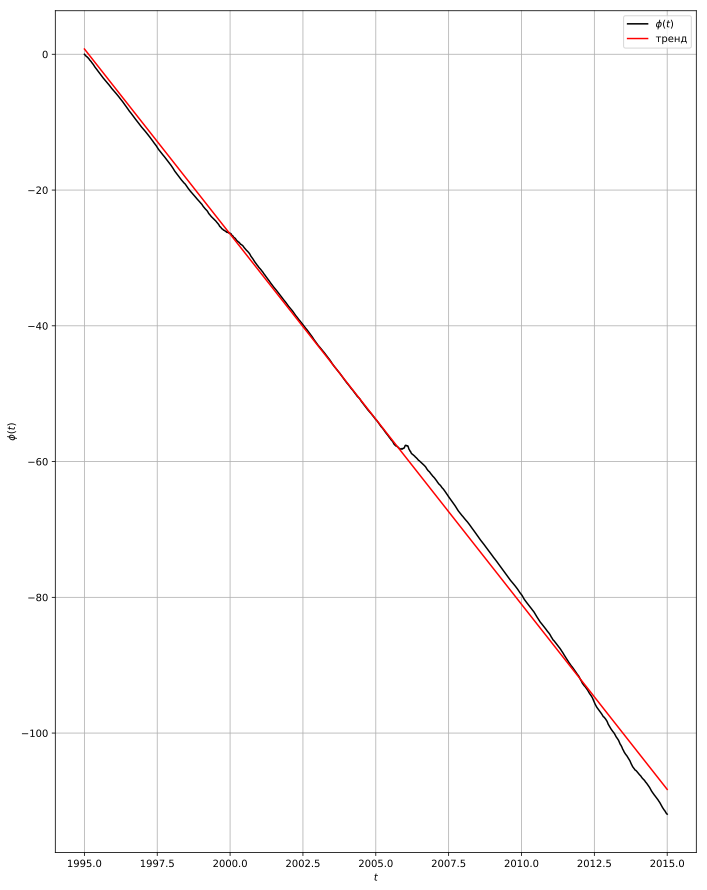

In [18]:
plt.figure(figsize=(11.5, 15.5))
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(filtred_date, phi, color="black", label="$\phi(t)$")
plt.plot(filtred_date, trend, color="red", label="тренд")
plt.legend()
plt.show()

Вычитаем из $\phi$ наш тренд

In [19]:
detrend_phi = phi - trend

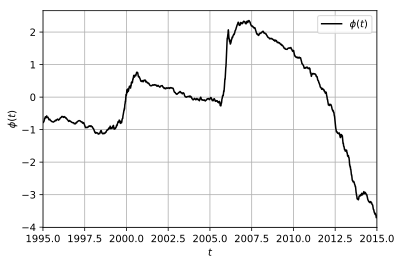

In [20]:
plt.figure()
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.xlim(filtred_date[0], filtred_date[-1])
plt.plot(filtred_date, detrend_phi, color="black", label="$\phi(t)$")
plt.legend()
plt.show()

# 3 Построим модель перехода


### Начало

Переход произошел примерно в 2007 году. Поэтому для построения модели отбросим из начального $\phi(t)$ (с линейной частью) все позднее 2007г.


In [21]:
i, = np.where(filtred_date == 2007.5002)
index_c = i[0]

In [22]:
model_date = filtred_date[:index_c]
model_phi = phi[:index_c]

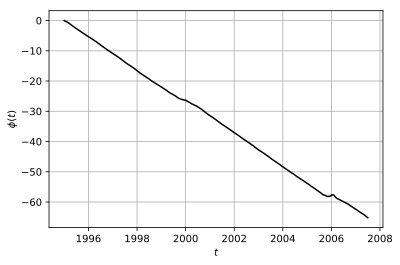

In [23]:
plt.figure()
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(model_date, model_phi, color="black", label="$\phi(t)$")
# plt.legend()
plt.show()

### Удалим линейную часть из $\phi(t)$

In [24]:
model_A = np.vstack([model_date, np.ones(len(model_date))]).T
model_a, model_b = np.linalg.lstsq(model_A, model_phi, rcond=None)[0]
print("a = {}, b = {}".format(model_a, model_b))
model_trend = model_a * model_date + model_b

a = -5.2549925558768384, b = 10483.278978811068


In [25]:
detrend_model_phi = model_phi - model_trend

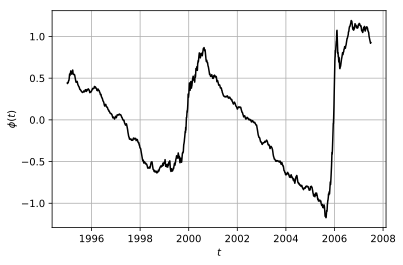

In [26]:
plt.figure()
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(model_date, detrend_model_phi, color="black", label="$\phi(t)$")
# plt.legend()
plt.show()

###  Отфильруем сигнала, удалив частоты > 1 года


#### Выгружаем нефильтр-е данные

In [27]:
with open("data_txt/model_phi.txt", 'w') as datatxt:
    for i in range(len(model_date)) :
        print(model_date[i], '\t', detrend_model_phi[i], file=datatxt)

#### Загружем отфильрованные данные

In [28]:
with open("data_txt/filtred_model_phi.txt", 'r') as data_txt:
    data = data_txt.read()
    data = data.split()
    filtred_model_phi = np.array(data[1::2]).astype(np.float32)
    print(filtred_model_phi.shape, model_date.shape)

(4565,) (4565,)


#### Выделим шум


In [29]:
model_noise = detrend_model_phi - filtred_model_phi

#### Построим полученные данные

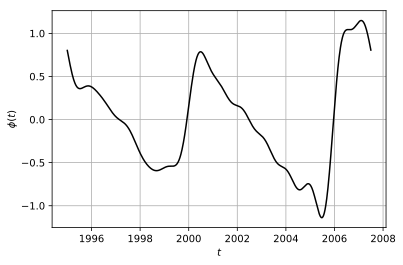

In [30]:
plt.figure()
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(model_date, filtred_model_phi, color="black", label="$\phi(t)$")
# plt.legend()
plt.show()

### Будем строить модель как отражение существ. данных и смещение на 1 - N

In [31]:
N = 0.85
bayes = 1 - N
bayes

0.15000000000000002

In [128]:
new_t_1 = model_date[:model_date.shape[0]//2]
new_phi_1 = filtred_model_phi[:len(new_t) - 1]
new_t_2 = model_date[model_date.shape[0]//2+1:]
new_phi_2 = filtred_model_phi[len(new_t):] - (1 - N) * (new_t_1 -  new_t_1[0])

print(new_t_1.size, new_t_2.size, new_phi_1.size, new_phi_2.size )

2282 2282 2282 2282


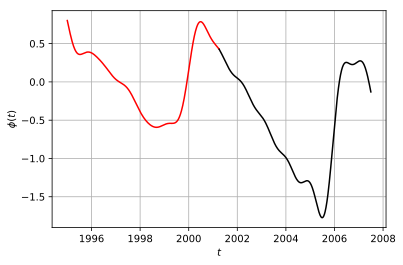

In [130]:
plt.figure()
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(new_t_1, new_phi_1, "red")
plt.plot(new_t_2, new_phi_2 , "black")

plt.show()

# Some Stuff



In [124]:
# model_A1 = np.vstack([model_date, np.ones(len(model_date))]).T
# model_a1, model_b1 = np.linalg.lstsq(model_A1, filtred_model_phi, rcond=None)[0]
# print("a = {}, b = {}".format(model_a1, model_b1))
# model_trend1 = model_a1 * model_date + model_b1
# print(model_trend1[0], model_date[0])
# new_m_x = (model_date - model_date[0]) * np.cos(0.15) + (model_trend1 - model_trend1[-1]) * np.sin(0.15) + model_date[0]
# new_m_y = -(model_date - model_date[0]) * np.sin(0.15) + (model_trend1 - model_trend1[-1]) * np.cos(0.15) - model_trend1[0]
# new_t = model_date + model_date[-1] - model_date[0]
# neфw_t = np.copy(model_date)
# new_phi = np.copy(filtred_model_phi) - (1 - N) * (model_date - model_date[0])